<a href="https://colab.research.google.com/github/jaidengoerlitx/Uber-Data-Analysis-Project/blob/main/Data_Analysis_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project 2

Jaiden Goerlitz, Texas A&M University '23

Statistics Undergrad

01/30/2023



## 1. Importing Packages and Mounting drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ColabNotebooks




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabNotebooks


### Data Analysis in 1D

Here I am analyzing some fake precipitation data. 

In [ ]:
np.random.seed(0)
precip_data = np.random.gamma(0.5, 20, 6*30)
print(precip_data)

[6.08003780e+00 7.56543440e+00 3.58966778e+00 3.82965135e+00
 1.75921708e+01 6.56985414e+00 1.00922431e-01 8.17567190e-03
 1.64282654e+01 8.61986198e+01 4.25926404e+00 2.79776796e-01
 4.11003300e-01 5.45678253e+00 1.39979344e+00 4.16146251e+00
 7.06113201e-03 7.86069281e+00 5.07137328e+01 2.58491861e+00
 1.12944531e+01 9.88088039e+00 8.85216440e-01 1.98990089e+00
 6.62723510e+00 8.72589985e-01 9.32425595e+00 4.34891474e+00
 5.05426570e-01 9.45209391e+00 7.72892498e-01 2.05473844e+01
 2.26136635e+01 1.36306244e+01 1.59959556e+00 1.75398033e+00
 2.02226605e+00 8.22980258e-02 6.53167768e+00 6.78319489e+00
 2.02972355e+00 3.47413531e-01 1.67511773e+00 2.14782273e+01
 1.03606134e+01 1.33761118e+01 1.23756253e+00 7.24138372e+00
 9.95308296e-01 3.99842208e+00 1.13867840e+01 1.97562477e+01
 2.96790598e+01 2.98090864e+01 1.27802010e+01 5.89041394e+01
 3.59306204e+00 7.36757723e-03 9.60737814e+00 8.05469707e+00
 3.67064442e-01 6.62102758e+00 6.73882180e+00 9.28478937e+00
 3.31656610e+01 3.799564

## Plotting

Now I will convert the data to a 1D numpy array and plot the data as a line. 

In [ ]:
precip = np.array(precip_data)
print(np.min(precip), np.mean(precip), np.max(precip))

0.0027443953658662663 10.337831551815961 86.19861981170743


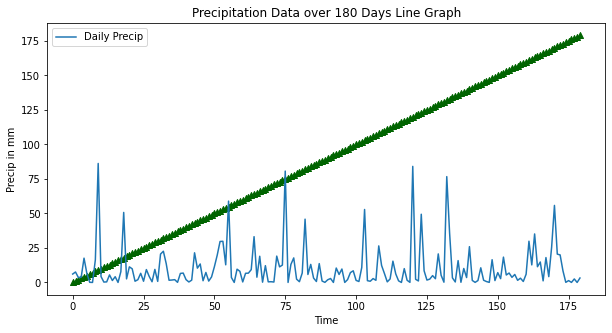

In [ ]:
precip = np.array(precip_data)

fig = plt.figure(figsize = (10, 5))
pr=fig.add_subplot(111)
pr.plot(precip, label="Daily Precip")
plt.xlabel("Time")
plt.ylabel("Precip in mm")
plt.legend(["Daily Precip"])
pr.scatter(np.arange(0, 180), np.arange(0, 180), color='darkgreen', marker='^')
plt.title("Precipitation Data over 180 Days Line Graph")
plt.show()

# Data plotted as line with a scatter plot against the data 
# and Labels, axis, and legend 

## Distribution Check

I want to see how the data varies over time so I will plot the data as a boxplot on one side of the figure and a histogram on the other side. 

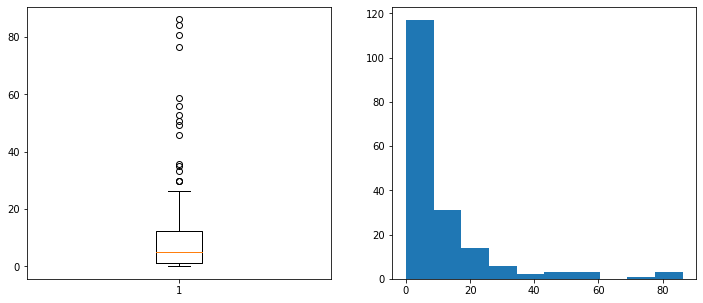

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

ax[0].boxplot(precip)
ax[1].hist(precip)
plt.show()

From above, the data appears to be skewd to the right. There also appears to be some outliers looking at both the boxplot and histogram. Due to these outliers I want to look closer into the abnormally 'high' percipitation. Looking at the data, I am going to let any day with over 40 mm of preciptation be considered extreme.

In [ ]:
precip_over_40 = np.where(precip>40, True, False)
print(precip_over_40)

[False False False False False False False False False  True False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
  True False False  True False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

The above looks good but now I am going to identify extreme events using quantiles. I am considering any day in the 10% of perciptation to be extreme (so over the 90% quantile). I will also plot the data again but color the "extreme" points. 

In [ ]:
precip_over_quantile = np.quantile(precip, .9)
np.where(precip_over_quantile<=precip, True, False)

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False,

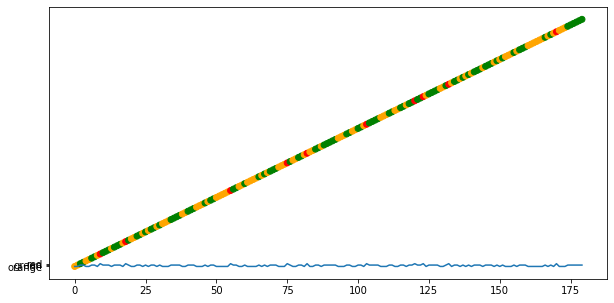

In [ ]:
color_ind = []

for i in range(len(precip)):
  if precip[i] > 40:
    color_ind.append('red')
  elif precip[i] < 5:
    color_ind.append('green')
  else:
    color_ind.append('orange')


plt.figure(figsize = (10, 5))
plt.plot(color_ind)
plt.scatter(np.arange(0, 180), np.arange(0,180), color=color_ind)
plt.show()

## Month by month!!

Taking a closer look at the data, it is actually 6 months of data (assuming a month is 30 days). So know I want to break the data down month by month and plot each month. 

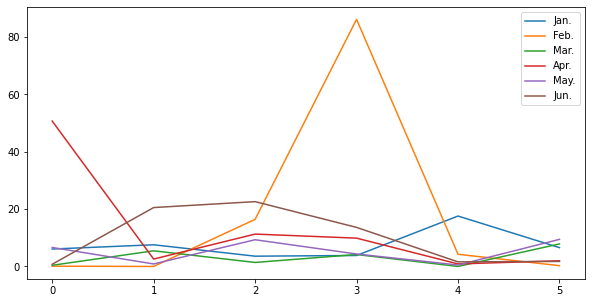

In [ ]:
# reshaping the data 
monthly_precip = precip.reshape(30, 6)


# plotting months
plt.figure(figsize = (10, 5))
jan = plt.plot(monthly_precip[0], label = "Jan.")
feb = plt.plot(monthly_precip[1], label = "Feb.")
mar = plt.plot(monthly_precip[2], label = "Mar.")
apr = plt.plot(monthly_precip[3], label = "Apr.")
may = plt.plot(monthly_precip[4], label = "May.")
jun = plt.plot(monthly_precip[5], label = "Jun.")
plt.legend()
plt.show()

Next I want to see the min, max, and mean for each month.

In [ ]:
print(np.min(monthly_precip[0]), np.min(monthly_precip[1]), np.min(monthly_precip[2]), np.min(monthly_precip[3]), np.min(monthly_precip[4]), np.min(monthly_precip[5]))
print(np.mean(monthly_precip[0]), np.mean(monthly_precip[1]), np.mean(monthly_precip[2]), np.mean(monthly_precip[3]), np.mean(monthly_precip[4]), np.mean(monthly_precip[5]))
print(np.max(monthly_precip[0]), np.max(monthly_precip[1]), np.max(monthly_precip[2]), np.max(monthly_precip[3]), np.max(monthly_precip[4]), np.max(monthly_precip[5]))

3.589667780057752 0.008175671901099392 0.007061132008761038 0.885216440079768 0.5054265704885978 0.7728924984741472
7.537802710316839 17.87917069095295 3.21613262069263 12.891517048445818 5.188419375406717 10.153023456797333
17.592170793623914 86.19861981170743 7.8606928091946004 50.71373282642361 9.45209390515704 22.613663530132353


# IMDB Movie Dataset

https://data.world/promptcloud/imdb-data-from-2006-to-2016

In [ ]:
movies = pd.read_csv("ColabNotebooks/IMDB-Movie-Data.csv", index_col="Title")
movies.head(3) 

FileNotFoundError: ignored

I want to see the relationship between movie ratings and revenue over time. I will filter the dataset an create three 1D arrays for ratings, year, and revenue. 

In [ ]:
movies_1mil = movies[movies['Revenue (Millions)'] > 1]
print(movies_1mil)

rating = movies_1mil[['Rating']].to_numpy()
print(rating)
revenue = movies_1mil[['Revenue (Millions)']].to_numpy()
print(revenue)
year = movies_1mil[['Year']].to_numpy()

print(np.max(rating), np.max(revenue), np.max(year))

Now I will plot all revenue and ratings data to see if there are any patterns.

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(movies_1mil['Revenue (Millions)'], movies_1mil['Rating'], c=movies_1mil['Year'])
plt.colormaps()
plt.colorbar()
plt.xlabel("Revenue in Millions")
plt.ylabel("Rating")
plt.title("Revenue v. Rating")
plt.show()

The data is highly concentrated for the range of Revenue between 1 and 200 million and rating range of 5 and 9. It is heavily skewed to the right.

Now I will look closer into ratings and revenue over time by filtering revenue by year. I will do 2006 and 2016.

In [ ]:
from decimal import Decimal

movies06 = movies[movies['Year'] == 2006]
movies16 = movies[movies['Year'] == 2016]


rating_2006 = movies06[['Rating']].to_numpy(dtype = float)
rating_2016 = movies16[['Rating']].to_numpy(dtype = float)
revenue_2006 = movies06[['Revenue (Millions)']].to_numpy(dtype = float, na_value = 0)
revenue_2016 = movies16[['Revenue (Millions)']].to_numpy(dtype = float, na_value = 0)

# print maxima
print(np.max(rating_2006), np.max(rating_2016), np.max(revenue_2006), np.max(revenue_2016))

Plotting 2006 and 2016 data as histograms. 

In [ ]:
plt.figure(figsize = (10, 5))
run06 = runtime_2006 = movies06[['Runtime (Minutes)']].to_numpy(dtype = int)
run16 = runtime2016 = movies16[['Runtime (Minutes)']].to_numpy(dtype = int)

plt.hist([run06, run16], alpha = 0.5, density = True)
plt.legend()
plt.show()

## 2. Wordcloud of "The Complete Works of William Shakespeare"

Project Gutenberg’s [The Complete Works of William Shakespeare, by William
Shakespeare](https://www.gutenberg.org/files/100/100-0.txt)

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you’ll
have to check the laws of the country where you are located before using
this ebook.

In [ ]:
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS

In [ ]:
text = open("Shakespeare.txt",'r', encoding ="utf8").read()

FileNotFoundError: ignored

In [ ]:
','.join(STOPWORDS)

In [ ]:
text.strip().replace("\n", " ").replace("\r", " ");
print ("There are {} words in the collection.".format(len(text)))

In [ ]:
wordcloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS, background_color='black').generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Ucomment to save the word cloud to a file.
#wordcloud.to_file("wordcloud.png")